In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import gc 

In [32]:
train = pd.read_csv('train.csv')

In [33]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [34]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

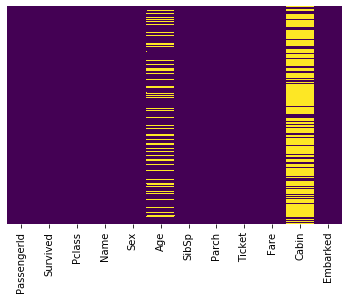

In [35]:
sns.heatmap(train.isnull(), yticklabels = False , cbar = False, cmap= 'viridis')

#### In the above given plot the yellow marks show that there is a null value there in those columns      as we can see that Age has few of the missing values whereas Cabin has a lot of missing value... well then maybe this column will be dropped

# countplot of survived passangers

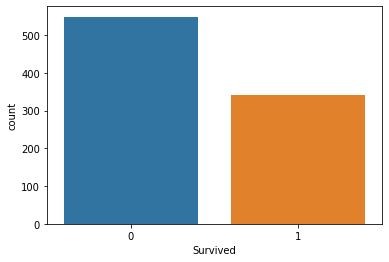

In [36]:
sns.countplot(x = 'Survived' , data = train)

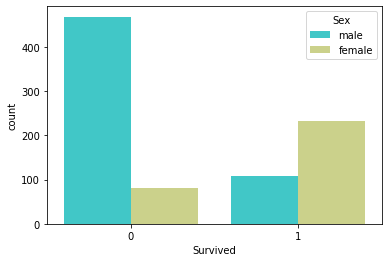

In [37]:
sns.countplot(x = 'Survived', hue = 'Sex' , data = train , palette= 'rainbow')

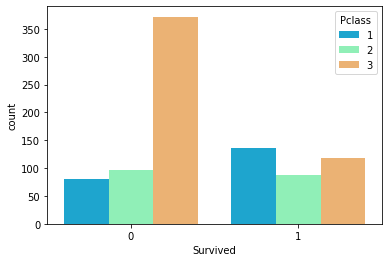

In [38]:
sns.countplot(x = 'Survived', hue='Pclass' , data = train, palette= 'rainbow')

In [39]:
count = 0

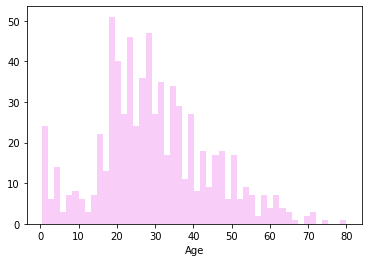

In [40]:
sns.distplot(train['Age'].dropna() , kde = False , color = 'violet' , bins = 50)

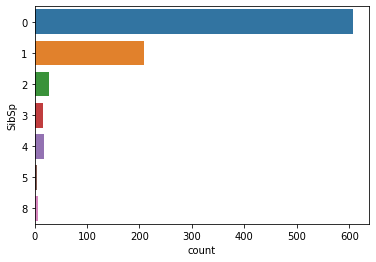

In [41]:
sns.countplot(y = 'SibSp' , data= train) 

# Data Cleaning

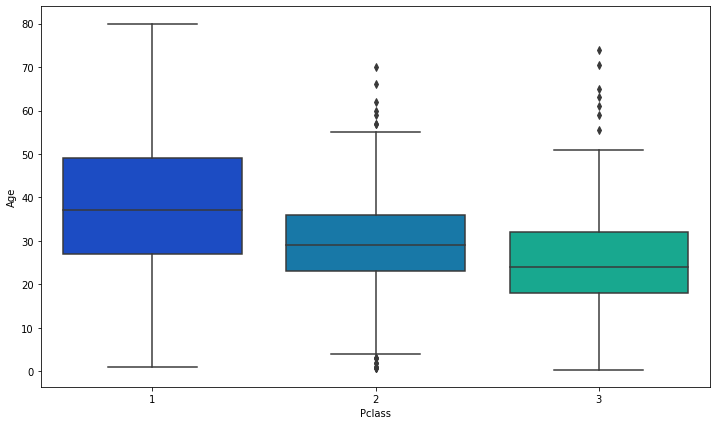

In [42]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass' , y = 'Age' , data = train , palette = 'winter')

In [43]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age 




In [44]:
train['Age'] = train[['Age' , 'Pclass']].apply(impute_age , axis = 1)

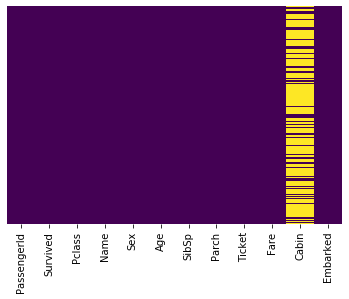

In [45]:
sns.heatmap(train.isnull(), yticklabels = False , cbar = False, cmap= 'viridis')

In [46]:
train.drop('Cabin' , axis = 1 , inplace = True)

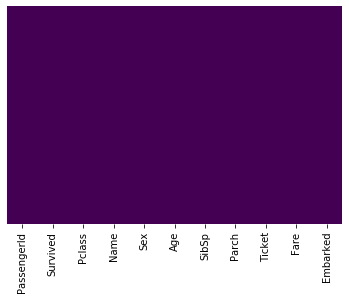

In [47]:
sns.heatmap(train.isnull(), yticklabels = False , cbar = False, cmap= 'viridis')

### now the data is free of null values next thing will be to convert the Categorical values into Numerical value, this can be done by converting them into dummy values. 

# Converting Categorical Values

In [48]:
pd.get_dummies(train['Embarked'] , drop_first = True)

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]

In [49]:
embark = pd.get_dummies(train['Embarked'] , drop_first = True)
sex = pd.get_dummies(train['Sex'] , drop_first = True)

In [51]:
train.drop(['Sex' , "Embarked" , 'Name' , 'Ticket'] , axis = 1 , inplace = True)

In [52]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [53]:
train = pd.concat([train , sex , embark] , axis = 1)

In [54]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

## See now the data is cleared and can be used to build the model,  we got to now seperate data into training data nad testing data   this is logistic Regresssion model 

# Train Test split

In [55]:
from sklearn.model_selection import train_test_split 

In [56]:
x_train , x_test , y_train , y_test = train_test_split( train.drop(['Survived'] , axis = 1) , train['Survived'] , test_size = 0.3 , random_state = 101 )

# Training and Predicting

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
logmodel = LinearRegression()
logmodel.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
prediction  = logmodel.predict(x_test)

In [47]:
lst = [1,2,3,4,5,6,7,8,9]

In [48]:
lst1 = iter(lst)

In [49]:
for i in range(0,len(lst)):
    print(next(lst1))

1
2
3
4
5
6
7
8
9
